In [1]:
# Load project functions
import crypto_monetary_base as cmb

In [2]:
import pandas as pd
import datetime
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set()
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.labelpad'] = 10
mpl.rc('text', usetex=True)
plt.style.use('ggplot')

from IPython.display import display

In [3]:
%load_ext version_information
%version_information pandas, matplotlib, seaborn

AttributeError: module 'cgi' has no attribute 'escape'

Software versions
Python 3.9.1 64bit [GCC 5.4.0 20160609]
IPython 7.19.0
OS Linux 5.8.0 0.bpo.2 amd64 x86_64 with glibc2.28
pandas 1.2.0
matplotlib 3.3.3
seaborn 0.11.1
Sun Jan 10 13:32:49 2021 EST

## Supply Curve Calculation

In [4]:
COIN_SYMBOL = 'BTS'

In [5]:
def datetime_bts_supply_curve(num_weeks):
    supply = [
        # Total distribution,
    ]
    start_date = datetime.date(2015, 10, 13)
    max_supply = 3600570502
    y = 2412 * 1e6
    supply.append([y])
    for week in range(num_weeks):
        weekly_distribution = 7 * (max_supply - y) / 2924
        y += weekly_distribution 
        supply.append([min((y, max_supply))])
    
    df = pd.DataFrame(
        supply, columns=['total_supply']
    )
    df['total_supply_pct'] = (
        df['total_supply'] / df['total_supply'].values[-1]
        * 100
    )
    df['date'] = pd.date_range(
        start=start_date,
        freq='W',
        periods=len(df)
    )
    return df

In [6]:
supply = datetime_bts_supply_curve(6350)

display(supply.head())
display(supply.tail())

,total_supply,total_supply_pct,date
0,2.412000e+09,66.989389,2015-10-18
1,2.414845e+09,67.068416,2015-10-25
2,2.417684e+09,67.147254,2015-11-01
3,2.420516e+09,67.225903,2015-11-08
4,2.423341e+09,67.304363,2015-11-15


,total_supply,total_supply_pct,date
6346,3.600570e+09,100.0,2137-06-02
6347,3.600570e+09,100.0,2137-06-09
6348,3.600570e+09,100.0,2137-06-16
6349,3.600570e+09,100.0,2137-06-23
6350,3.600570e+09,100.0,2137-06-30


<module 'matplotlib.pyplot' from '/home/lane/.local/share/virtualenvs/crypto-monetary-base-xxmj4jsc/lib/python3.9/site-packages/matplotlib/pyplot.py'>

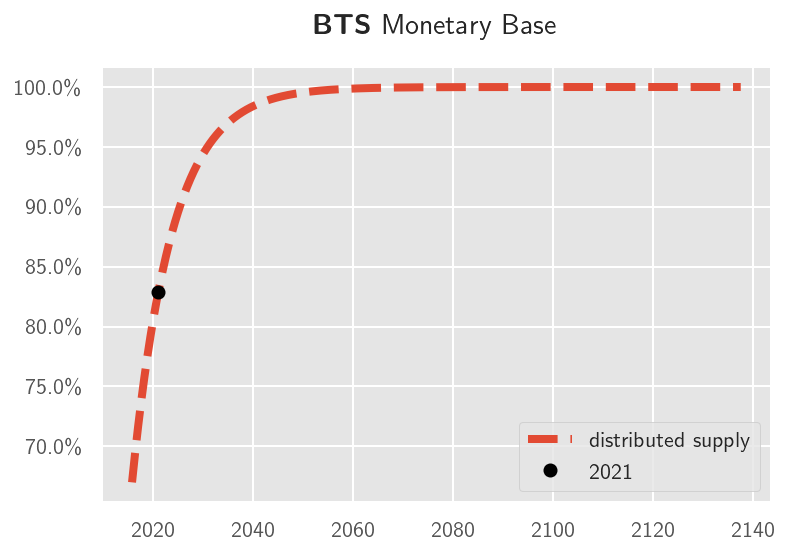

In [7]:
cmb.plot_supply_curve(
    supply,
    'BTS',
    fmt='--'
);

## Standardize Time Series

In [8]:
weekly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='weekly')

display(weekly_supply.head())
display(weekly_supply.tail())

Wrote 6351 lines to file ../output-data/BTS_weekly.csv


,coin,total_supply,total_supply_pct,date
0,BTS,2.412000e+09,66.989389,2015-10-01
1,BTS,2.414845e+09,67.068416,2015-10-01
2,BTS,2.417684e+09,67.147254,2015-11-01
3,BTS,2.420516e+09,67.225903,2015-11-01
4,BTS,2.423341e+09,67.304363,2015-11-01


,coin,total_supply,total_supply_pct,date
6346,BTS,3.600570e+09,100.0,2137-06-01
6347,BTS,3.600570e+09,100.0,2137-06-01
6348,BTS,3.600570e+09,100.0,2137-06-01
6349,BTS,3.600570e+09,100.0,2137-06-01
6350,BTS,3.600570e+09,100.0,2137-06-01


In [9]:
monthly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='monthly')

display(monthly_supply.head())
display(monthly_supply.tail())

Wrote 1461 lines to file ../output-data/BTS_monthly.csv


,coin,total_supply,total_supply_pct,date
0,BTS,2.412000e+09,66.989389,2015-10-01
1,BTS,2.417684e+09,67.147254,2015-11-01
2,BTS,2.431775e+09,67.538620,2015-12-01
3,BTS,2.442928e+09,67.848353,2016-01-01
4,BTS,2.456718e+09,68.231367,2016-02-01


,coin,total_supply,total_supply_pct,date
1456,BTS,3.600570e+09,100.0,2137-02-01
1457,BTS,3.600570e+09,100.0,2137-03-01
1458,BTS,3.600570e+09,100.0,2137-04-01
1459,BTS,3.600570e+09,100.0,2137-05-01
1460,BTS,3.600570e+09,100.0,2137-06-01


In [10]:
yearly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='yearly')

display(yearly_supply.head())
display(yearly_supply.tail())

Wrote 123 lines to file ../output-data/BTS_yearly.csv


,coin,total_supply,total_supply_pct,date
0,BTS,2.412000e+09,66.989389,2015-10-01
1,BTS,2.442928e+09,67.848353,2016-01-01
2,BTS,2.578583e+09,71.615949,2017-01-01
3,BTS,2.700501e+09,75.002039,2018-01-01
4,BTS,2.805973e+09,77.931352,2019-01-01


,coin,total_supply,total_supply_pct,date
118,BTS,3.600570e+09,99.999994,2133-01-01
119,BTS,3.600570e+09,99.999996,2134-01-01
120,BTS,3.600570e+09,99.999997,2135-01-01
121,BTS,3.600570e+09,99.999998,2136-01-01
122,BTS,3.600570e+09,99.999999,2137-01-01
